# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

## <span style="color:green"> Parallel processing with Traveling Salesman Problem</span>

In this notebook, we enhance the code from Exercise 09 to tackle a more challenging task: solving the **Traveling Salesman Problem** (TSP) with **50 cities**.
Incorporating a parallel programming approach into this genetic algorithm offers advantages beyond just computational speed. By utilizing N cores, we can achieve the following:

- Generate N solutions by allowing **each core to work independently**. This approach is valuable for statistical analysis of our algorithm's performance.

- Facilitate **communication among the N cores** by exchanging the best solutions after a specified number of generations. This enhancement significantly boosts the capabilities of our algorithm.

### Exercise 10.1

The parallelization was esecuted with MPI libraries in order to solve the TSP by performing a *Genetic Search* using 7 **parallel GA searches of the optimal path**. 
In contrast to the previous exercise, we employ the $L^{(2)}$ cost function. 

For each processor we change the seed of the random number generator. This allows us to have multiple independent populations evolving, thus enabling us to explore multiple local minima.

In parallel computation, at regular intervals, each core shares its best result with the other cores. We use the *MPI_Bcast()* method of MPI library which execute a broad cast from each one core to all the others.
In total we do 7 migrations each 4 generations.


core 0: best L^2 value: 9511.23
core 1: best L^2 value: 20082.6
core 2: best L^2 value: 20042.8
core 3: best L^2 value: 19999.3
core 4: best L^2 value: 5449.83


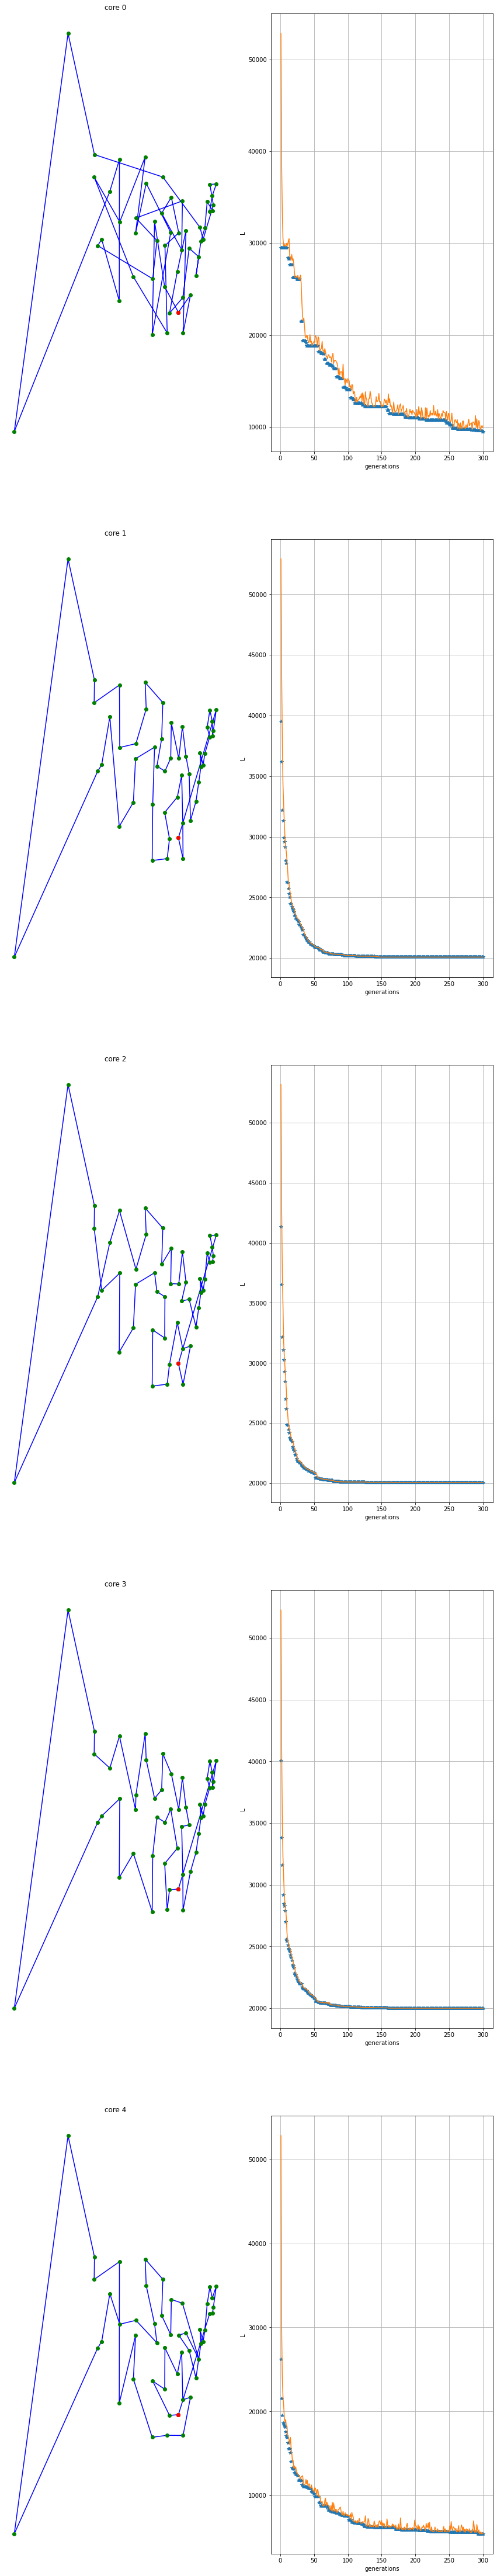

In [15]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

size = 5
data_x = []
data_y = []
data_L = []
data_L_means = []

for i in range(size):
    filexy = './data/out_order_N' + str(i)+ '.0.dat'
    fileL = './data/out_L_N' + str(i)+ '.0.dat'
    x_cities, y_cities= np.loadtxt(filexy, usecols= (0,1), unpack = "true")
    x_L, L, L_ave= np.loadtxt(fileL, usecols= (0,1,2), unpack = "true")
    x_cities = np.append(x_cities,x_cities[0])
    y_cities = np.append(y_cities,y_cities[0])
    data_x.append(x_cities)
    data_y.append(y_cities)
    data_L.append(L)
    data_L_means.append(L_ave)


fig, axs = plt.subplots(size,2, figsize = (15,80) )

for i in range(size):
    axs[i,0].plot(data_x[i][:],data_y[i][:], "-", color = "blue")
    axs[i,0].plot(data_x[i][:],data_y[i][:], "o", color = "green")
    axs[i,0].plot(data_x[i][:1],data_y[i][:1], "o", color = "red")
    axs[i,0].set_title('core ' + str(i))
    axs[i,0].axis("off")
 
    axs[i,1].plot(x_L,data_L[i][:], "*")
    axs[i,1].plot(x_L,data_L_means[i][:])
    axs[i,1].set_xlabel("generations")
    axs[i,1].set_ylabel("L")
    axs[i,1].grid(True)
    print( "core {}: best L^2 value: {}".format(i,data_L[i][-1]) )
 

### Exercise 10.2

We want to see what is the impact of the broadcast migration between the cores in our code.
Hence, we execute the same code for 7 NON comunicating cores.

core 0: best L^2 value: 9511.23
core 1: best L^2 value: 20082.6
core 2: best L^2 value: 20042.8
core 3: best L^2 value: 19999.3
core 4: best L^2 value: 5449.83


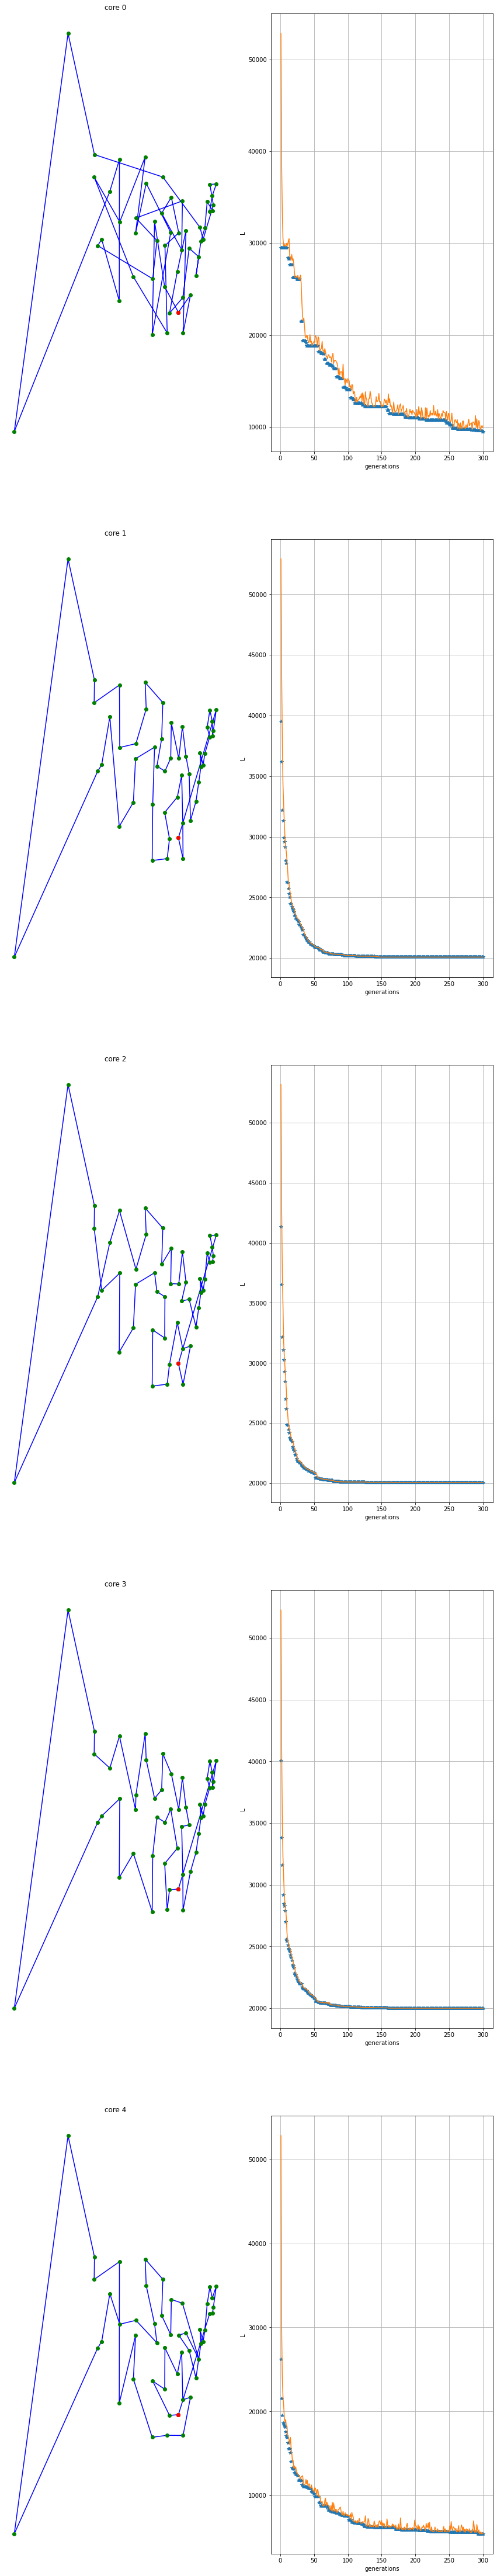

In [16]:

size = 5
data_x = []
data_y = []
data_L = []
data_L_means = []

for i in range(size):
    filexy = './data/out_order_N' + str(i)+ '.0.dat'
    fileL = './data/out_L_N' + str(i)+ '.0.dat'
    x_cities, y_cities= np.loadtxt(filexy, usecols= (0,1), unpack = "true")
    x_L, L, L_ave= np.loadtxt(fileL, usecols= (0,1,2), unpack = "true")
    x_cities = np.append(x_cities,x_cities[0])
    y_cities = np.append(y_cities,y_cities[0])
    data_x.append(x_cities)
    data_y.append(y_cities)
    data_L.append(L)
    data_L_means.append(L_ave)


fig, axs = plt.subplots(size,2, figsize = (15,80) )

for i in range(size):
    axs[i,0].plot(data_x[i][:],data_y[i][:], "-", color = "blue")
    axs[i,0].plot(data_x[i][:],data_y[i][:], "o", color = "green")
    axs[i,0].plot(data_x[i][:1],data_y[i][:1], "o", color = "red")
    axs[i,0].set_title('core ' + str(i))
    axs[i,0].axis("off")
 
    axs[i,1].plot(x_L,data_L[i][:], "*")
    axs[i,1].plot(x_L,data_L_means[i][:])
    axs[i,1].set_xlabel("generations")
    axs[i,1].set_ylabel("L")
    axs[i,1].grid(True)
    print( "core {}: best L^2 value: {}".format(i,data_L[i][-1]) )
 